---
## CSVファイル読み込み DataFrameに保存

In [37]:
import pandas as pd
import numpy as np

csv_encoding = 'Shift_JISx0213'
inputFile = ".\\Data\\05_DateTimeData.csv"
#inputFile = "C:\\work\\pyCSV\\data\\STD\\STD_Step000\\STD-JH_H26.csv"

df = pd.read_csv(inputFile,index_col=False, encoding=csv_encoding)
df['ImpDate'] = pd.to_datetime(df['ImpDate'], format='%Y-%m-%d')
display(df.shape)
display(df.head(5))
display(df.dtypes)

(312372, 6)

,ProNum,AnsShNum,SchCode,ImpDate,ImpTime,ClaCode
0,1,1000043,30120231,2019-05-06,13:07:11,0
1,4,1000043,30120231,2019-05-08,13:23:57,0
2,4,1000055,30120231,2019-05-08,13:23:57,0
3,2,1000055,30120231,2019-05-07,13:05:52,0
4,2,1000057,30120231,2019-05-07,13:05:52,0


ProNum               int64
AnsShNum             int64
SchCode              int64
ImpDate     datetime64[ns]
ImpTime             object
ClaCode              int64
dtype: object

In [38]:
display(df.tail(5))

,ProNum,AnsShNum,SchCode,ImpDate,ImpTime,ClaCode
312367,2,9020402,31120473,2019-05-07,13:05:53,0
312368,4,9020404,31120473,2019-05-08,13:24:01,0
312369,2,9020406,31120473,2019-05-07,13:05:44,0
312370,4,9020512,32620185,2019-05-17,13:05:27,0
312371,4,9020534,34020390,2019-05-17,13:05:27,0


---
## ClaCode == 0 のみ抽出

In [39]:
df_Cla0 = df[df["ClaCode"] ==0]
display(df_Cla0.shape)

(292904, 6)

---
## ProNum(1～5)の値でDataFrameを分割

In [40]:
df_p1 = df_Cla0[df_Cla0["ProNum"]==1]
df_p2 = df_Cla0[df_Cla0["ProNum"]==2]
df_p3 = df_Cla0[df_Cla0["ProNum"]==3]
df_p4 = df_Cla0[df_Cla0["ProNum"]==4]
df_p5 = df_Cla0[df_Cla0["ProNum"]==5]
display(df_p1.head(5))

,ProNum,AnsShNum,SchCode,ImpDate,ImpTime,ClaCode
0,1,1000043,30120231,2019-05-06,13:07:11,0
11,1,1000061,30120231,2019-05-06,13:07:11,0
22,1,1000101,30120231,2019-05-06,13:07:11,0
24,1,1000104,30120231,2019-05-06,13:07:11,0
25,1,1000106,30120231,2019-05-06,13:07:11,0


---
## ImpDateでグルーピングし、グルーピングされた行数(count())を保持

In [41]:
df_p1_byDate = df_p1.groupby(["ImpDate"]).count()
df_p2_byDate = df_p2.groupby(["ImpDate"]).count()
df_p3_byDate = df_p3.groupby(["ImpDate"]).count()
df_p4_byDate = df_p4.groupby(["ImpDate"]).count()
df_p5_byDate = df_p5.groupby(["ImpDate"]).count()
display(df_p1_byDate.head(5))

,ProNum,AnsShNum,SchCode,ImpTime,ClaCode
ImpDate,,,,,
2019-04-23,126,126,126,126,126
2019-04-24,203,203,203,203,203
2019-04-25,332,332,332,332,332
2019-04-26,489,489,489,489,489
2019-04-27,323,323,323,323,323


---
## AnsShNumの値だけにし、ヘッダを変更

In [42]:
df_p1_byDate_count = df_p1_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro1-1"})
df_p2_byDate_count = df_p2_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro1-2"})
df_p3_byDate_count = df_p3_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro1-3"})
df_p4_byDate_count = df_p4_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro2"})
df_p5_byDate_count = df_p5_byDate[["AnsShNum"]].rename(columns={"AnsShNum": "Pro3"})
display(df_p1_byDate_count.head(5))

,Pro1-1
ImpDate,
2019-04-23,126
2019-04-24,203
2019-04-25,332
2019-04-26,489
2019-04-27,323


---
## DataFrameを連結

In [43]:
df_result = pd.concat([df_p1_byDate_count, df_p2_byDate_count], axis=1, sort=False)
df_result = pd.concat([df_result, df_p3_byDate_count], axis=1, sort=False)
df_result = pd.concat([df_result, df_p4_byDate_count], axis=1, sort=False)
df_result = pd.concat([df_result, df_p5_byDate_count], axis=1, sort=False)
display(df_result.head(5))

,Pro1-1,Pro1-2,Pro1-3,Pro2,Pro3
ImpDate,,,,,
2019-04-23,126.0,1.0,NaN,28.0,NaN
2019-04-24,203.0,1.0,NaN,NaN,NaN
2019-04-25,332.0,3.0,NaN,71.0,80.0
2019-04-26,489.0,3.0,NaN,15.0,58.0
2019-04-27,323.0,5.0,NaN,4.0,73.0


NameError: name 'DateFormatter' is not defined

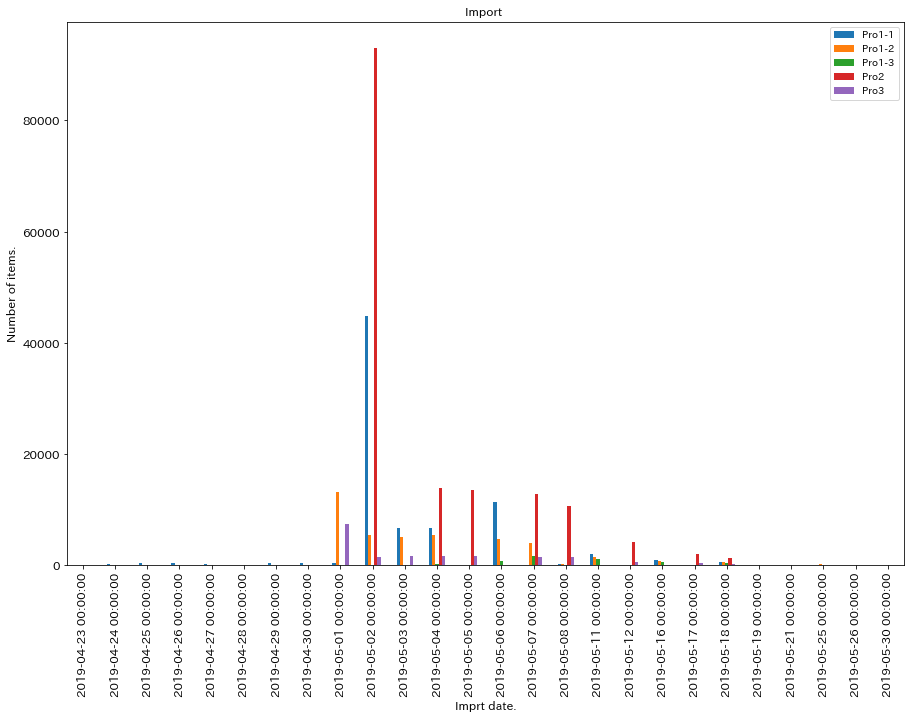

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
ax = df_result.plot(kind='bar', title ="Import ", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Imprt date.", fontsize=12)
ax.set_ylabel("Number of items.", fontsize=12)
ax.xaxis.set_major_formatter(DateFormatter("%m-%d"))

plt.show()